In [1]:
import os, glob
current_location = os.getcwd()
os.chdir(current_location)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## 3.1
Obtain the “hsbdemo” dataset. Create a classifier using logistic regression as well as kNN from the reading, writing, mathematics, and science scores of the high-school students. Evaluate the classifiers' accuracies in predicting which academic program the student will be joining. Compare these two classifiers (at least their accuracies).

In [2]:
df = pd.read_csv("./data/hsbdemo.csv", index_col= 0)
df.head(3)

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
1,45,female,low,public,vocation,34,35,41,29,26,not enrolled,0,1
2,108,male,middle,public,general,34,33,41,36,36,not enrolled,0,1
3,15,male,high,public,vocation,39,39,44,26,42,not enrolled,0,1


In [3]:
X = df.iloc[:,5:9]
y = df["prog"]
#y = np.where(df_quality['label'] == 'B', 0, 1)

#Creating X and Y for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [4]:
#Creating Logisitic Regression model
model = LogisticRegression()
model.fit(X_train,y_train)

#Predicting on Test set
predictions = model.predict(X_test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

0.55
[[24  0  8]
 [ 8  1  7]
 [ 4  0  8]]
              precision    recall  f1-score   support

    academic       0.67      0.75      0.71        32
     general       1.00      0.06      0.12        16
    vocation       0.35      0.67      0.46        12

    accuracy                           0.55        60
   macro avg       0.67      0.49      0.43        60
weighted avg       0.69      0.55      0.50        60



In [5]:
#Creating KNN Classfier model
knn = KNeighborsClassifier(n_neighbors=3)

#Fitting the training data
knn.fit(X_train,y_train)

#Predicting on the test data
predictions = knn.predict(X_test)

print("k=", 3)
#Printing Confusion matrix and accuracy socres 
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

k= 3
0.5666666666666667
[[25  4  3]
 [10  2  4]
 [ 5  0  7]]
              precision    recall  f1-score   support

    academic       0.62      0.78      0.69        32
     general       0.33      0.12      0.18        16
    vocation       0.50      0.58      0.54        12

    accuracy                           0.57        60
   macro avg       0.49      0.50      0.47        60
weighted avg       0.52      0.57      0.53        60



## 3.2 
Download weather.csv. Entirely fictitious, it supposedly concerns the weather conditions that are suitable for playing some unspecified game. There are four predictor variables: outlook, temperature, humidity, and wind. The outcome is whether to play (“yes,” “no,” “maybe”). Build a classifier using logistic regression and then kNN, with each learning how various predictor variables could relate to the outcome. Report the accuracies of your models.

In [6]:
df = pd.read_csv("./data/weather.csv")
df.head(3)

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,maybe
1,sunny,80,90,True,no
2,overcast,83,86,False,yes


In [7]:
X = df.iloc[:,1:4]
y = df.iloc[:,-1]

#Creating X and Y for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
#Creating Logisitic Regression model
model = LogisticRegression()
model.fit(X_train,y_train)

#Predicting on Test set
predictions = model.predict(X_test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

0.4
[[0 1 1]
 [0 0 0]
 [1 0 2]]
              precision    recall  f1-score   support

       maybe       0.00      0.00      0.00         2
          no       0.00      0.00      0.00         0
         yes       0.67      0.67      0.67         3

    accuracy                           0.40         5
   macro avg       0.22      0.22      0.22         5
weighted avg       0.40      0.40      0.40         5



In [9]:
#Creating KNN Classfier model
knn = KNeighborsClassifier(n_neighbors=3)

#Fitting the training data
knn.fit(X_train,y_train)

#Predicting on the test data
predictions = knn.predict(X_test)

print("k=", 3)
#Printing Confusion matrix and accuracy socres 
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

k= 3
0.4
[[0 1 1]
 [0 0 0]
 [1 0 2]]
              precision    recall  f1-score   support

       maybe       0.00      0.00      0.00         2
          no       0.00      0.00      0.00         0
         yes       0.67      0.67      0.67         3

    accuracy                           0.40         5
   macro avg       0.22      0.22      0.22         5
weighted avg       0.40      0.40      0.40         5



## 3.3
The dataset crash.csv is an accident-survivors dataset portal for the USA (crash data for individual States can be searched) hosted by data.gov. The dataset contains passengers’ (not necessarily the driver’s) age and the speed of the vehicle (mph) at the time of impact and the fate of the passengers (1 represents survived, 0 represents did not survive) after the crash.

Use logistic regression first with just age, then just speed, and then both to learn the survivability of the passenger. Which one of these models gives the best testing accuracy?

Now, do the same with kNN, this time working with different values of k.

In [10]:
df = pd.read_csv("./data/crash.csv")
df.head(3)

,PassengerId,Age,Speed,Survived
0,1,22,65,0
1,2,38,50,1
2,3,26,45,1


In [11]:
X = df.iloc[:,1:3]
y = df["Survived"]

#Creating X and Y for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [12]:
#Creating Logisitic Regression model
model = LogisticRegression()
model.fit(X_train,y_train)

#Predicting on Test set
predictions = model.predict(X_test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

0.5
[[2 1]
 [2 1]]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



Text(0, 0.5, 'accuracy')

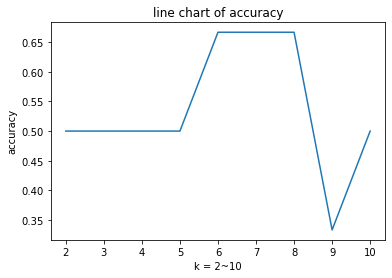

In [13]:
k_list = []
acc_record = []
for k in range(2, 11):
    #Creating KNN Classfier model
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fitting the training data
    knn.fit(X_train,y_train)

    #Predicting on the test data
    predictions = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test,predictions)
    #print("k=", k)
    #Printing Confusion matrix and accuracy socres 
    #print(confusion_matrix(y_test,predictions))
    #print(accuracy)
    
    k_list.append(k)
    acc_record.append(accuracy)
    
# Plot of accuracy
plt.plot(k_list, acc_record)
#plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])

plt.title('line chart of accuracy')
plt.xlabel('k = 2~10')
plt.ylabel('accuracy')